<a href="https://colab.research.google.com/github/Ivan412/training/blob/main/6_python_advaced/3_visualization/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Продвинутый Python. Часть 3: Визуализация данных. Визуализация зависимостей.

---


#**Задание: результаты марафона**

Загрузите данные по итогам марафона

https://video.ittensive.com/python-advanced/marathon-data.csv

Приведите время половины и полной дистанции к секундам.

Найдите, данные каких серии данных коррелируют (используя диаграмму pairplot в Seaborn).

Найдите коэффициент корреляции этих серий данных, используя scipy.stats.pearsonr.

Постройте график jointplot для коррелирующих данных.

In [6]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
data  = pd.read_csv('https://video.ittensive.com/python-advanced/marathon-data.csv', delimiter=',')

In [7]:
#приводим результаты к секундам
data['split'] = data['split'].apply(lambda x: int(pd.Timedelta(x).total_seconds()))
data['final'] = data['final'].apply(lambda x: int(pd.Timedelta(x).total_seconds()))

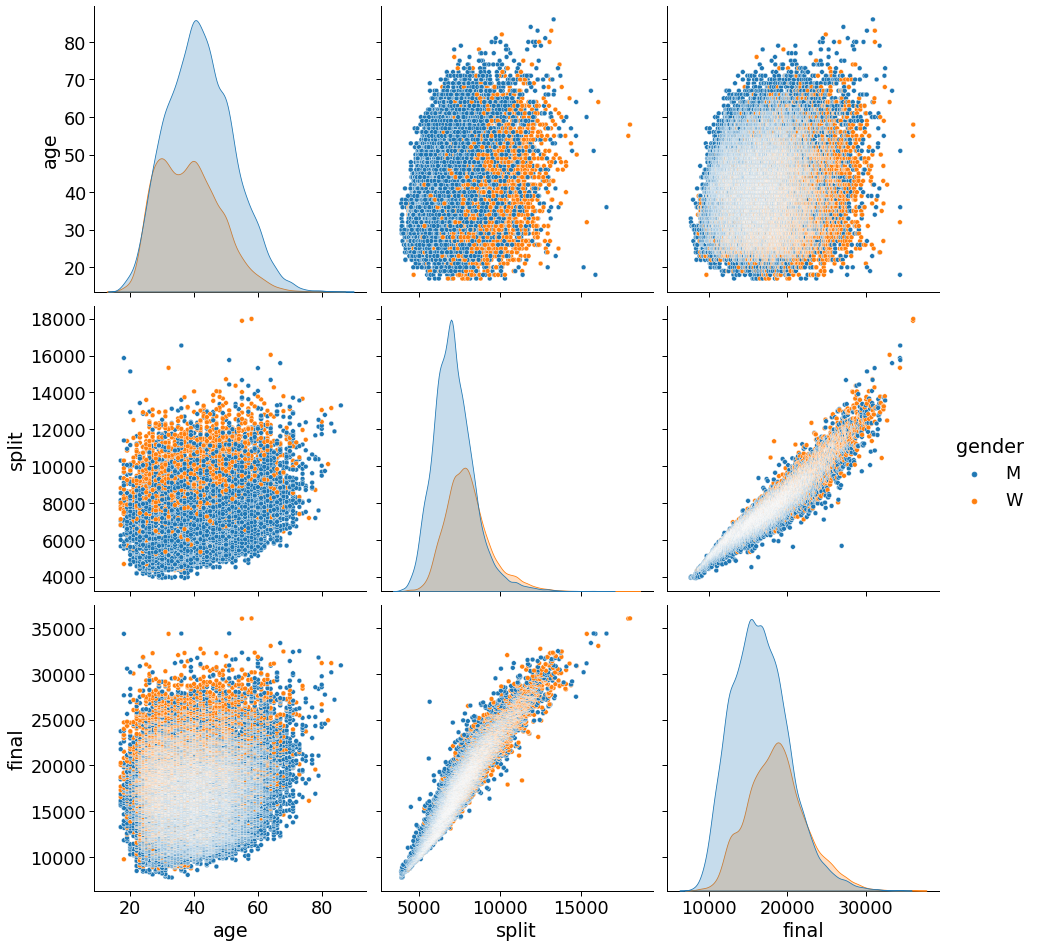

In [9]:
#ищем кореляцию глазками
sns.set_context("paper", font_scale=2)
sns.pairplot(data, hue='gender', height=4.5)
plt.show()

In [10]:
#вычисляем коэффициент корреляции
cor = round(stats.pearsonr(data['split'], data['final'])[0], 2)
print(f'Коэффициент корреляции Пирсона между полумарафоном и марафоном: {cor}')

Коэффициент корреляции Пирсона между полумарафоном и марафоном: 0.96


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


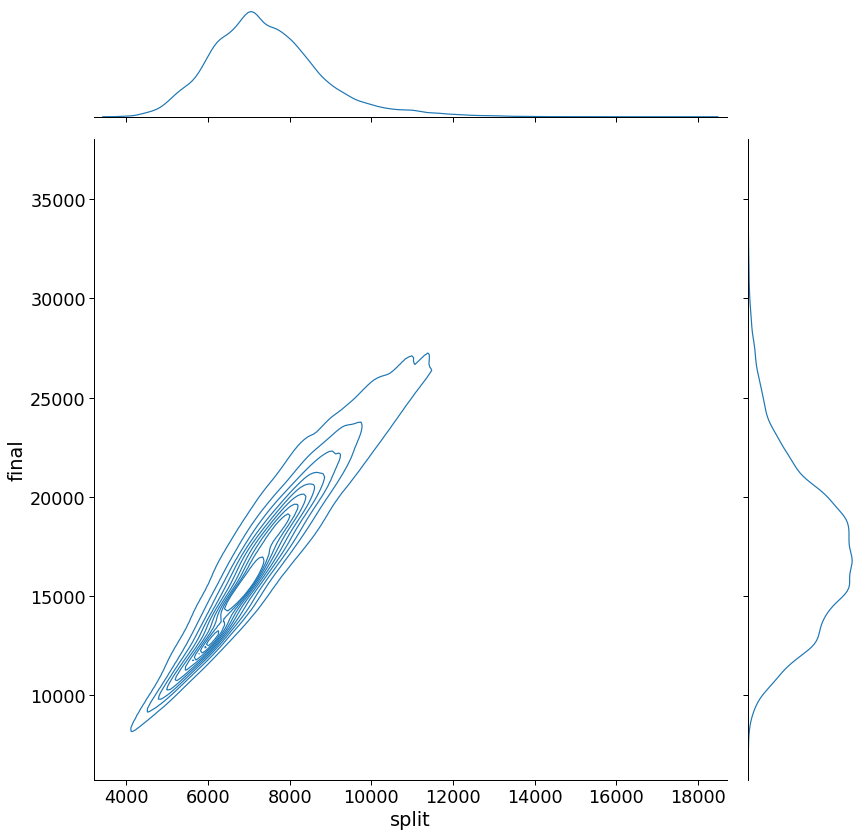

In [14]:
#строим joinplot
sns.jointplot('split', 'final', data, height=12, kind="kde")
plt.show()